In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
import matplotlib.pyplot as plt

Using TensorFlow backend.
c:\users\bnbsking\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\bnbsking\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\bnbsking\miniconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\bnbsking\mi

In [2]:
(xTrain, y0), (xVal, y1) = mnist.load_data()
xTrain, xVal = xTrain.reshape(60000, 28, 28, 1), xVal.reshape(10000, 28, 28, 1)
xTrain, xVal = xTrain/255., xVal/255.
yTrain, yVal = np.zeros((60000,10)), np.zeros((10000,10))
for i in range(60000):
    yTrain[i][y0[i]] = 1
    if i < 10000:
        yVal[i][y1[i]] = 1
        
print(xTrain.shape, yTrain.shape, xVal.shape, yVal.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [3]:
inputL = Input(shape=(28,28,1))
x = Conv2D(64, (3,3), padding='same', activation='relu')(inputL)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2), padding='same')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputL, x)
model.compile(optimizer=Adam(lr=0.0001), loss=categorical_crossentropy, \
    metrics=[categorical_accuracy])
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0  

In [4]:
history = model.fit(xTrain, yTrain, epochs=10, validation_data=(xVal, yVal))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.3583 - categorical_accuracy: 0.8901 - val_loss: 0.0971 - val_categorical_accuracy: 0.9701
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1000 - categorical_accuracy: 0.9691 - val_loss: 0.0537 - val_categorical_accuracy: 0.9816
Epoch 3/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0723 - categorical_accuracy: 0.9776 - val_loss: 0.0429 - val_categorical_accuracy: 0.9857
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0570 - categorical_accuracy: 0.9820 - val_loss: 0.0369 - val_categorical_accuracy: 0.9860
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0450 - categorical_accuracy: 0.9861 - val_loss: 0.0315 - val_categorical_accuracy: 0.9895
Epoch 6/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0393 - catego

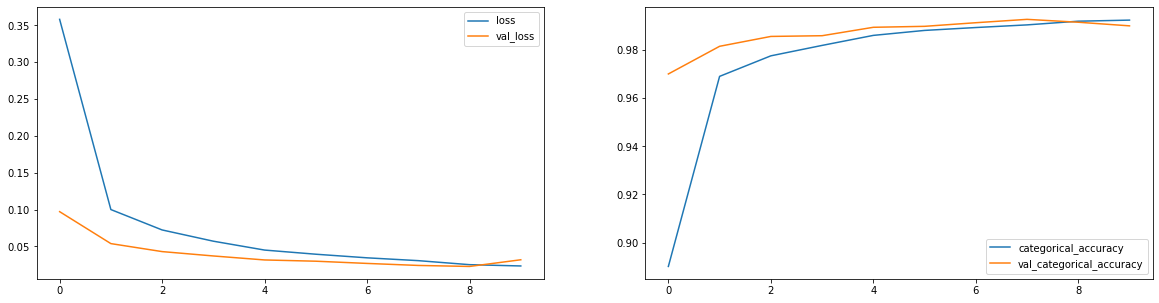

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(labels=['loss', 'val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.legend(labels=['categorical_accuracy', 'val_categorical_accuracy'])
plt.show()

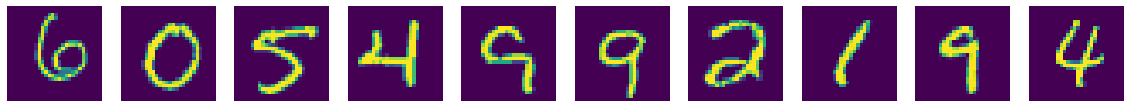

[6, 0, 5, 4, 9, 9, 2, 1, 9, 4]


In [11]:
start = 100
pred = model.predict( xVal[start:start+10] )
result = [np.argmax(row) for row in pred]

plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(xVal[start+i].reshape(28,28))
    plt.axis('off')
plt.show()

print(result)